In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import json
import seaborn as sns 

# import api_key from config file
from config import ashleys_key

# Read in CSV files
athlete_events_data = "Resources/athlete_events2.csv"
noc_data = "Resources/noc_regions2.csv"
gdp_data = "Resources/gdp_data.csv"

# Creating data frames
athlete_events_df = pd.read_csv(athlete_events_data)
noc_df = pd.read_csv(noc_data)
gdp_df = pd.read_csv(gdp_data)
#rename 'region' to 'Country'
noc_df = noc_df.rename(columns={'region':"Country"})

# # Combine NOC & athlete data so that the 
olympic_df = pd.merge(athlete_events_df, noc_df, on=["NOC"])
olympic_df = athlete_events_df.merge(noc_df,how='left', left_on=["NOC"], right_on=["NOC"])
olympic_df.head()

#Merge to create final DF
merge_table = olympic_df.merge(gdp_df,how='left', left_on=["Country", "Year"], right_on=["Country", "Year"])
merge_table.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,notes,GDP PC,Population,Total GDP
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,2731.0,1163363.0,3.180000e+12
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,10654.0,1344394.0,1.430000e+13
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,5411.0,3242.0,1.754246e+10
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,4295.0,2561.0,1.099950e+10
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,23273.0,14761.0,3.440000e+11


In [2]:
bmi = (merge_table["Weight"])/np.power(((merge_table["Height"])/100),2)
merge_table3 = pd.DataFrame(
    {
        'bmi': bmi,
        'medal': merge_table['Medal'],
        'sport': merge_table['Sport'],
        'year': merge_table['Year'],
        'sex': merge_table['Sex'],
    }
)

merge_table3.fillna(0)

,bmi,medal,sport,year,sex
0,24.691358,0,Basketball,1992,M
1,20.761246,0,Judo,2012,M
2,0.000000,0,Football,1920,M
3,0.000000,Gold,Tug-Of-War,1900,M
4,23.959094,0,Speed Skating,1988,F
...,...,...,...,...,...
271111,27.776911,0,Luge,1976,M
271112,19.047004,0,Ski Jumping,2014,M
271113,19.047004,0,Ski Jumping,2014,M
271114,28.049671,0,Bobsleigh,1998,M


In [3]:
bmi = (merge_table["Weight"])/np.power(((merge_table["Height"])/100),2)
merge_table2 = pd.DataFrame(
    {
        'bmi': bmi,
        'medal': merge_table['Medal'],
        'event': merge_table['Event'],
        'year': merge_table['Year'],
        'sex': merge_table['Sex'],
        'season': merge_table['Season'],
        'country': merge_table['Country']
    }
)

merge_table2

,bmi,medal,event,year,sex,season,country
0,24.691358,NaN,Basketball Men's Basketball,1992,M,Summer,China
1,20.761246,NaN,Judo Men's Extra-Lightweight,2012,M,Summer,China
2,NaN,NaN,Football Men's Football,1920,M,Summer,Denmark
3,NaN,Gold,Tug-Of-War Men's Tug-Of-War,1900,M,Summer,Denmark
4,23.959094,NaN,Speed Skating Women's 500 metres,1988,F,Winter,Netherlands
...,...,...,...,...,...,...,...
271111,27.776911,NaN,Luge Mixed (Men)'s Doubles,1976,M,Winter,Poland
271112,19.047004,NaN,"Ski Jumping Men's Large Hill, Individual",2014,M,Winter,Poland
271113,19.047004,NaN,"Ski Jumping Men's Large Hill, Team",2014,M,Winter,Poland
271114,28.049671,NaN,Bobsleigh Men's Four,1998,M,Winter,Poland


In [4]:
win = merge_table2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
win

,bmi,medal,event,year,sex,season,country
40,25.106333,Bronze,Ice Hockey Men's Ice Hockey,2014,M,Winter,Finland
41,20.897959,Bronze,Gymnastics Men's Individual All-Around,1948,M,Summer,Finland
42,20.897959,Gold,Gymnastics Men's Team All-Around,1948,M,Summer,Finland
44,20.897959,Gold,Gymnastics Men's Horse Vault,1948,M,Summer,Finland
48,20.897959,Gold,Gymnastics Men's Pommelled Horse,1948,M,Summer,Finland
...,...,...,...,...,...,...,...
271078,28.344671,Silver,Athletics Women's Shot Put,1956,F,Summer,Russia
271080,28.344671,Bronze,Athletics Women's Shot Put,1964,F,Summer,Russia
271082,24.755464,Bronze,"Fencing Men's Foil, Team",1980,M,Summer,Poland
271102,21.887076,Bronze,Athletics Women's 4 x 400 metres Relay,2000,F,Summer,Russia


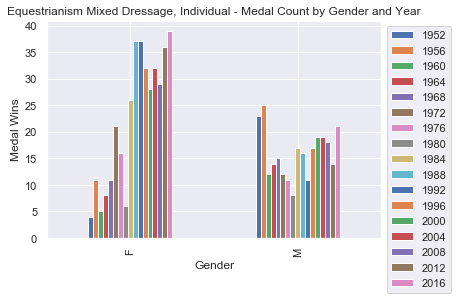

<Figure size 432x288 with 0 Axes>

In [25]:
equest1 = merge_table2[merge_table2["event"] == "Equestrianism Mixed Dressage, Individual"].fillna(0)
equest = equest1.groupby(['sex','year'])
equest_graph = equest['medal'].count()

chart = equest_graph.unstack('year').plot(kind = "bar", 
        title='Equestrianism Mixed Dressage, Individual - Medal Count by Gender and Year').legend(bbox_to_anchor=(1, 1))
plt.xlabel('Gender')
plt.ylabel('Medal Wins')
plt.show()
plt.savefig('equest1.png')

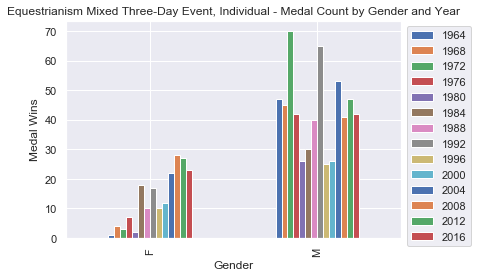

<Figure size 432x288 with 0 Axes>

In [26]:
equest1 = merge_table2[merge_table2["event"] == "Equestrianism Mixed Three-Day Event, Individual"].fillna(0)
equest = equest1.groupby(['sex','year'])
equest_graph = equest['medal'].count()

chart = equest_graph.unstack('year').plot(kind = "bar", 
        title='Equestrianism Mixed Three-Day Event, Individual - Medal Count by Gender and Year').legend(bbox_to_anchor=(1, 1))
plt.xlabel('Gender')
plt.ylabel('Medal Wins')
plt.show()
plt.savefig('equest2.png')

In [7]:
event_medal = win.loc[:,["country", "medal", "event","year"]]
event_medal1 = event_medal[event_medal["event"] == "Basketball Men's Basketball"]
event_medal1

,country,medal,event,year
609,USA,Gold,Basketball Men's Basketball,2000
1029,Spain,Bronze,Basketball Men's Basketball,2016
1807,Lithuania,Bronze,Basketball Men's Basketball,2000
3836,Russia,Silver,Basketball Men's Basketball,1964
3911,Croatia,Silver,Basketball Men's Basketball,1992
...,...,...,...,...
270613,Russia,Silver,Basketball Men's Basketball,1956
270614,Russia,Silver,Basketball Men's Basketball,1960
270740,Lithuania,Bronze,Basketball Men's Basketball,1996
270741,Lithuania,Bronze,Basketball Men's Basketball,2000


Text(0, 0.5, 'Medals Won over Duration of Olympics')

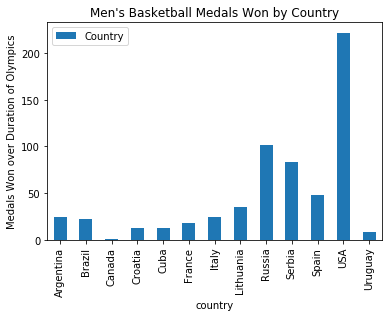

In [8]:
basketball_country = event_medal1.groupby("country")
basketball_medal = basketball_country["medal"].count()

graph_df = pd.DataFrame({"Country": basketball_medal})
graph_df.plot.bar(rot=90, title= "Men's Basketball Medals Won by Country").set_ylabel("Medals Won over Duration of Olympics")

In [9]:
w_event_medal = win.loc[:,["country", "medal", "event","year"]]
w_event_medal1 = w_event_medal[event_medal["event"] == "Basketball Women's Basketball"]
w_event_medal1

,country,medal,event,year
1035,Russia,Bronze,Basketball Women's Basketball,2008
1856,Brazil,Silver,Basketball Women's Basketball,1996
1857,Brazil,Bronze,Basketball Women's Basketball,2000
1863,Brazil,Bronze,Basketball Women's Basketball,2000
4457,Brazil,Silver,Basketball Women's Basketball,1996
...,...,...,...,...
268776,China,Bronze,Basketball Women's Basketball,1984
269043,China,Bronze,Basketball Women's Basketball,1984
269242,China,Silver,Basketball Women's Basketball,1992
269244,China,Bronze,Basketball Women's Basketball,1984


Text(0, 0.5, 'Medals Won over Duration of Olympics')

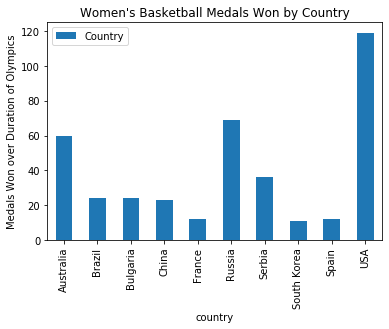

In [10]:
w_basketball_country = w_event_medal1.groupby("country")
w_basketball_medal = w_basketball_country["medal"].count()

graph_df = pd.DataFrame({"Country": w_basketball_medal})
graph_df.plot.bar(rot=90, title= "Women's Basketball Medals Won by Country").set_ylabel("Medals Won over Duration of Olympics")

Text(0, 0.5, 'Medals Won over Duration of Olympics')

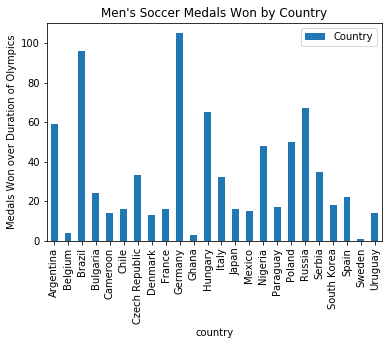

In [11]:
soccer_medal = win.loc[:,["country", "medal", "event","year"]]
soccer_medal1 = soccer_medal[event_medal["event"] == "Football Men's Football"]

soccer_country = soccer_medal1.groupby("country")
soccer_medal = soccer_country["medal"].count()

graph_df = pd.DataFrame({"Country": soccer_medal})
graph_df.plot.bar(rot=90, title= "Men's Soccer Medals Won by Country").set_ylabel("Medals Won over Duration of Olympics")

Text(0, 0.5, 'Medals Won over Duration of Olympics')

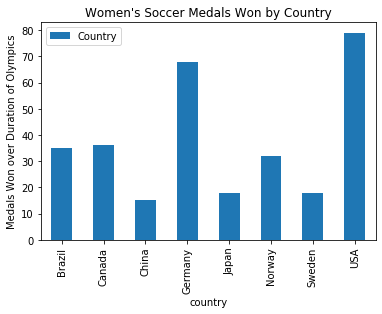

In [12]:
w_soccer_medal = win.loc[:,["country", "medal", "event","year"]]
w_soccer_medal1 = w_soccer_medal[event_medal["event"] == "Football Women's Football"]

w_soccer_country = w_soccer_medal1.groupby("country")
w_soccer_medal = w_soccer_country["medal"].count()

w_soc_graph_df = pd.DataFrame({"Country": w_soccer_medal})
w_soc_graph_df.plot.bar(rot=90, title= "Women's Soccer Medals Won by Country").set_ylabel("Medals Won over Duration of Olympics")

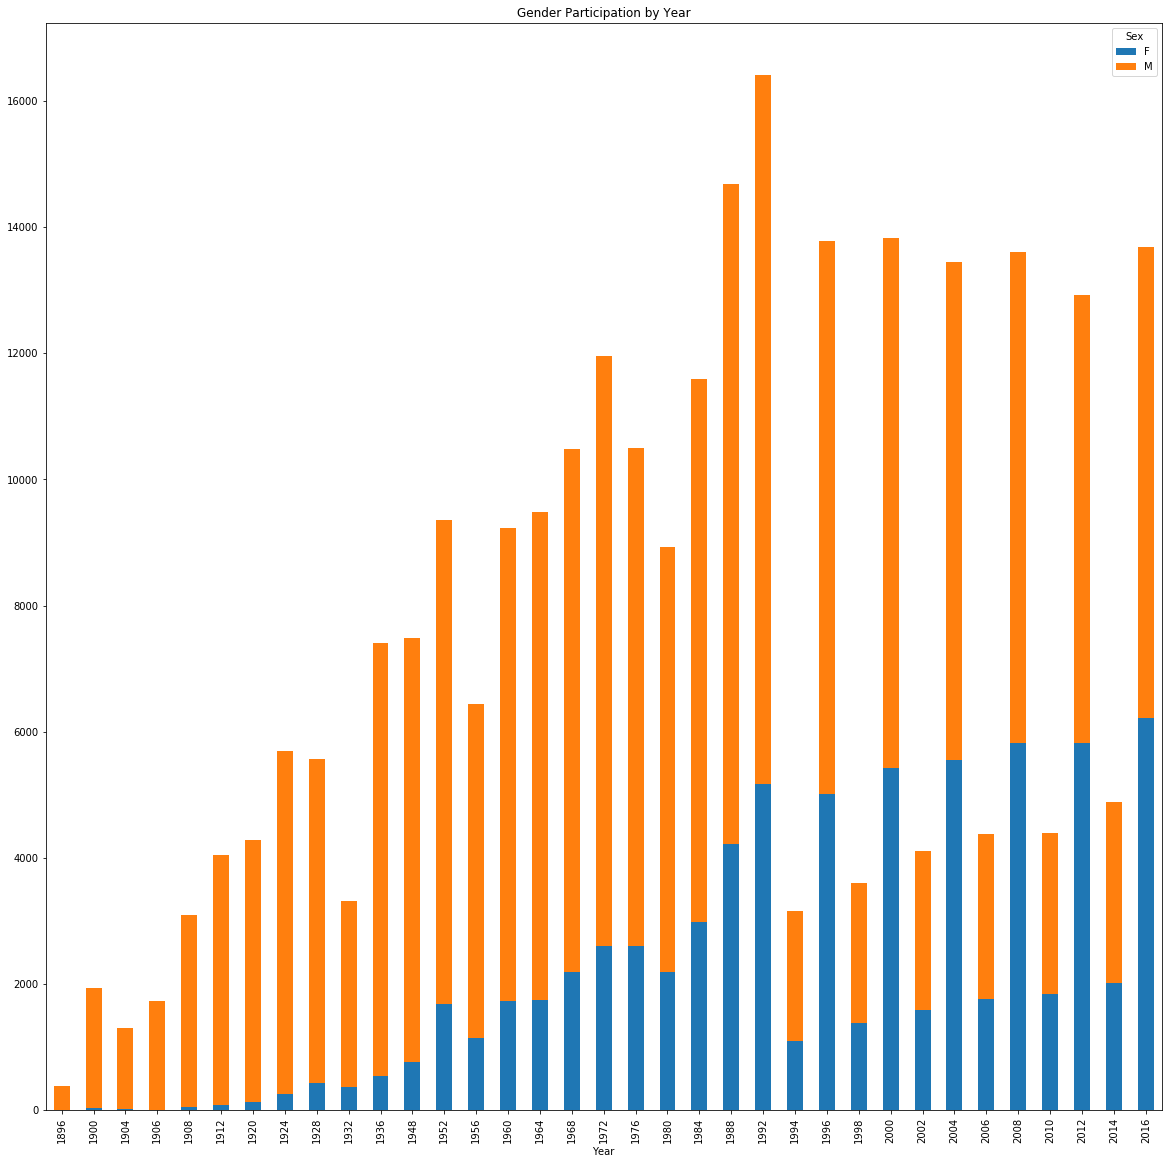

In [13]:
year_gender_participation = merge_table.groupby(["Year", "Sex"]).size().unstack().plot(kind='bar',stacked=True, figsize=(20,20), title= "Gender Participation by Year")
plt.savefig('gender by year')

In [14]:
summer_games = merge_table[(merge_table.Season == "Summer")]
winter_games = merge_table[(merge_table.Season == "Winter")]

summer_events = summer_games.groupby(["Year"])["Event"].nunique().reset_index()
winter_events = winter_games.groupby(["Year"])["Event"].nunique().reset_index()

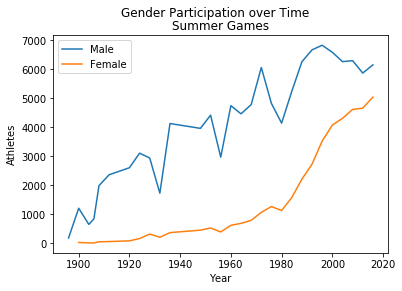

In [15]:
summer_male   = summer_games[(summer_games.Sex == 'M')]
summer_female = summer_games[(summer_games.Sex == 'F')]


num_sum_m   = summer_male.groupby(["Year"])["ID"].nunique().reset_index()
num_sum_f = summer_female.groupby(["Year"])["ID"].nunique().reset_index()

plt.plot(num_sum_m.Year, num_sum_m.ID)
plt.plot(num_sum_f.Year, num_sum_f.ID)

plt.suptitle('Gender Participation over Time')
plt.title('Summer Games')
plt.xlabel('Year')
plt.ylabel('Athletes')
plt.legend(["Male", "Female"])


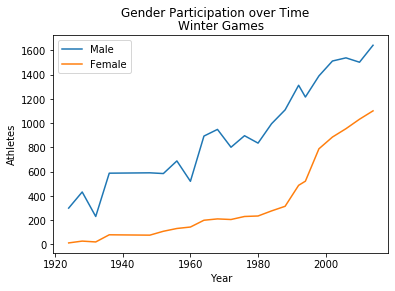

In [16]:
winter_male   = winter_games[(winter_games.Sex == 'M')]
winter_female = winter_games[(winter_games.Sex == 'F')]

num_sum_m   = winter_male.groupby(["Year"])["ID"].nunique().reset_index()
num_sum_f = winter_female.groupby(["Year"])["ID"].nunique().reset_index()

plt.plot(num_sum_m.Year, num_sum_m.ID)
plt.plot(num_sum_f.Year, num_sum_f.ID)

plt.suptitle('Gender Participation over Time')
plt.title('Winter Games')
plt.xlabel('Year')
plt.ylabel('Athletes')
plt.legend(["Male", "Female"])

In [17]:
men_time_df= merge_table3[(merge_table3.sex == 'M') & (merge_table3.sport == 'Gymnastics')]
w_time_df = merge_table3[(merge_table3.sex == 'F') & (merge_table3.sport == 'Gymnastics')]
w_time_df

,bmi,medal,sport,year,sex
676,18.75,NaN,Gymnastics,1972,F
677,18.75,Silver,Gymnastics,1972,F
678,18.75,NaN,Gymnastics,1972,F
679,18.75,NaN,Gymnastics,1972,F
680,18.75,NaN,Gymnastics,1972,F
...,...,...,...,...,...
270907,NaN,NaN,Gymnastics,1952,F
270908,NaN,NaN,Gymnastics,1952,F
270909,NaN,NaN,Gymnastics,1952,F
270910,NaN,NaN,Gymnastics,1952,F


Text(0, 0.5, 'Count of Male Athletes')

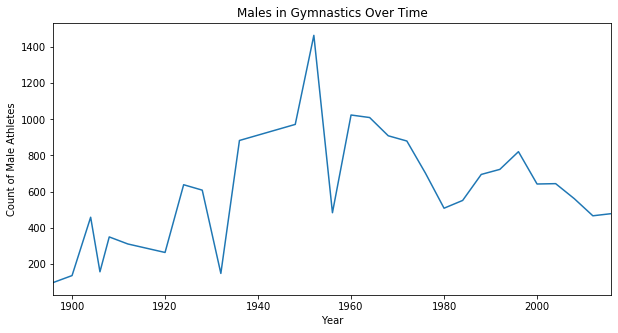

In [18]:
part = men_time_df.groupby('year')['sex'].value_counts()
plt.figure(figsize=(10, 5))
part.loc[:, "M"].plot()
plt.title("Males in Gymnastics Over Time")
plt.xlabel("Year")
plt.ylabel("Count of Male Athletes")

Text(0, 0.5, 'Count of Female Athletes')

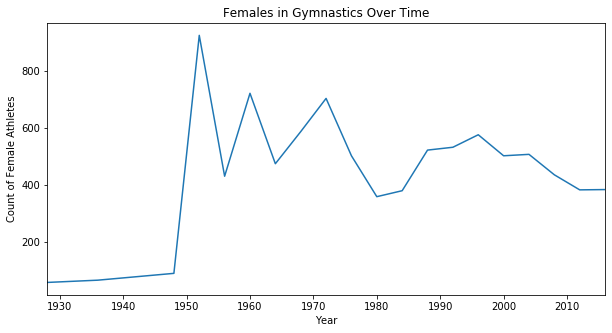

In [19]:
part = w_time_df.groupby('year')['sex'].value_counts()
plt.figure(figsize=(10,5))
part.loc[:,"F"].plot()
plt.title("Females in Gymnastics Over Time")
plt.xlabel("Year")
plt.ylabel("Count of Female Athletes")

In [20]:
win2 = merge_table3.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

men_gym_time = win2[(win2.sex == 'M') & (win2.sport == 'Gymnastics')]
w_gym_time = win2[(win2.sex == 'F') & (win2.sport == 'Gymnastics')]
w_gym_time

,bmi,medal,sport,year,sex
677,18.750000,Silver,Gymnastics,1972,F
1089,21.000730,Bronze,Gymnastics,1964,F
1121,17.777778,Bronze,Gymnastics,2008,F
1942,19.227688,Silver,Gymnastics,2012,F
2005,18.261505,Gold,Gymnastics,1984,F
...,...,...,...,...,...
270696,19.227688,Bronze,Gymnastics,1968,F
270698,19.227688,Silver,Gymnastics,1968,F
270702,19.227688,Silver,Gymnastics,1972,F
270704,19.227688,Silver,Gymnastics,1972,F


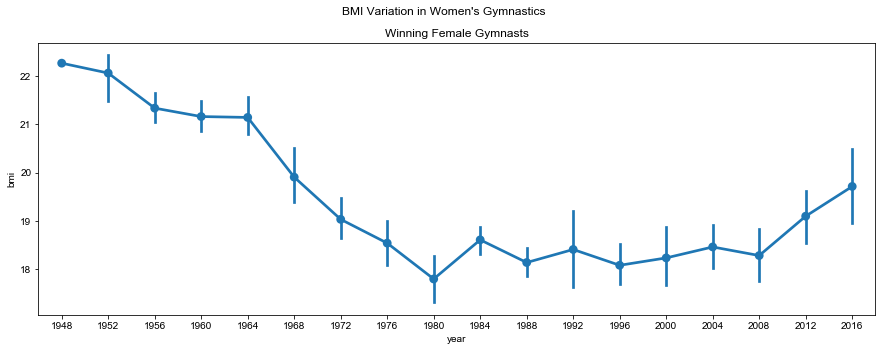

In [21]:
plt.figure(figsize=(15,5))
sns.pointplot('year', 'bmi', data=w_gym_time)
plt.title("Winning Female Gymnasts")
plt.suptitle("BMI Variation in Women's Gymnastics")
sns.set(style="darkgrid")

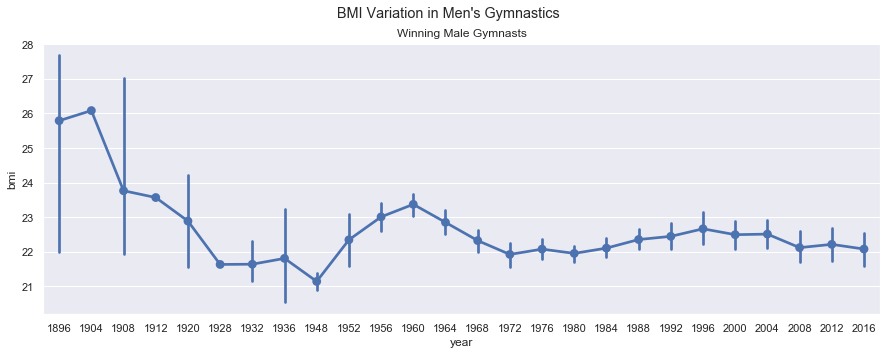

In [22]:
plt.figure(figsize=(15,5))
sns.pointplot('year', 'bmi', data=men_gym_time)
plt.title("Winning Male Gymnasts")
plt.suptitle("BMI Variation in Men's Gymnastics")
sns.set(style="darkgrid")